<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/MAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates Multiarmed bandits- UCB1 Algorithm

## UCB1 Algorithm Implementation :

This is a variant of the UCB algorithm that is implemented in this notebook.

### Equation :-

$ A_n = argmax_a ( Q_n(a) +c \sqrt{{\dfrac{2ln(n)}{k_n(a)}} ) }$

- $n$- total number of times the arm has been pulled so far.
- $Q_n(a)$ - current estimate of the value of a given slot machine $a$ at time $'n'$
- $\dfrac{log(n)}{k_n(a)}$- $log$ of the total number of times the slot machines have been tried ($n$) divided by the number of times we've tried each slot machine $a$ ($k_n$)
- We choose our next slot machine by selecting whichever bandit gives the largest value of $A_n$ at each step n.
- c : constant; usually = 1 for UCB1 algorithm. In this notebook this is a tunable parameter
which is multiplied to the variance estimate 
- The square root term is an estimate of the variance of each action $a$ , If we haven’t chosen a bandit yet, the variance is infinite (we’d be dividing by 0) meaning that’s going to be our next choice. This forces the algorithm to explore those unknown values quickly.


### References and Links:
1) [Understanding UCB1 Algorithm](https://docs.microsoft.com/en-us/archive/msdn-magazine/2019/august/test-run-the-ucb1-algorithm-for-multi-armed-bandit-problems#understanding-the-ucb1-algorithm)

2) [An Interesting Demo](https://cse442-17f.github.io/LinUCB/)

3)[Multi-Armed Bandits: UCB Algorithm](https://towardsdatascience.com/multi-armed-bandits-ucb-algorithm-fa7861417d8c)

4) [Paper : Finite-time Analysis of the Multiarmed Bandit
Problem](https://link.springer.com/content/pdf/10.1023/A:1013689704352.pdf)



## Initialization:
- $k_n(a)$ =1 to ensure we don't get `NaN` values in Python
- Note that $Q^*(a)$ is the true mean of each of the one armed bandits, and it has been initialised randomly with values between 0 and 1 
using `mu = np.random.uniform(0, 1, k)`


In [ ]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import random
from IPython import display
import ipywidgets as widgets


class ucb_bandit:
    '''
    Upper Confidence Bound Bandit
    
    Inputs 
    ============================================
    k: number of arms (int)
    mu: set the average rewards for each of the k-arms.

    '''
    def __init__(self, k, c=1,mu='random'):
        # Number of arms
        self.k = k
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)   #arm counts

        self.c=c

        self.cum_reward=np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)   
        # Mean reward for each arm
        self.avg_k_reward = np.zeros(k)

        self.mu = np.random.uniform(0, 1, k)  # probability of winning (p)
        #self.mu= np.array([0.3,0.6,0.8])
        self.UCB=np.zeros(k)

      
    def pull(self):

      self.UCB=self.c*np.sqrt( (2*np.log(self.n)) / self.k_n)

      a = np.argmax(self.avg_k_reward + self.c * np.sqrt( 
              (2*np.log(self.n)) / self.k_n))
      r=random.random()
      if r<=self.mu[a]:
        # win
        self.cum_reward[a]+=1
        win="Wins"

      else:
        #lose
        self.cum_reward[a]+=0
        win="Loses"
 
      
      # Update counts
      self.n += 1
      self.k_n[a] += 1
      
      # Update total
      self.mean_reward = np.sum(self.cum_reward)/self.n
      self.avg_k_reward=np.divide(self.cum_reward,self.k_n)

      
      return a,win
        

        
    def run(self):

      decision,win=self.pull()

      return decision,win
            
    def reset(self, c, mu='random'):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.avg_k_reward = np.zeros(self.k)
        self.cum_reward=np.zeros(k)
        self.c=c
 

def plot_portfolio(trialno,decision=0,win="Lose"):
  #Plot

  plt.figure(figsize=(8,8))
  fig=plt.gcf()
  fig.set_facecolor('white')
  arms=np.arange(1,k+1)
  plt.xticks(np.arange(0, k+1, step=1))  # Set label locations.
  plt.yticks(np.arange(-2.2, 2.2, step=0.4))
  plt.xlim(0,k+1)
  plt.ylim(-2,2)
  # Actual mean - q*(a)
  plt.scatter(arms,ucb.mu,marker='x',s=100,color='red',label="$Q*(a)$",clip_on=False)
  # Avg mean so far   
  plt.scatter(arms,ucb.avg_k_reward,marker='x',s=100,color='green',label='Q_{n}(a)'.format(n=trialno),clip_on=False)
  if trialno !=0:
    ymin,_=plt.ylim()
    plt.scatter(arms[decision],ymin , c='y', marker="*", s=150, label="Selected arm",clip_on=False)
    plt.gca().text(decision+1-0.2, -1.85, 'Arm {} {}'.format(decision+1,win), style='italic',bbox={'facecolor': 'red', 'alpha': 0.5})
    plt.scatter(arms, ucb.avg_k_reward+ucb.UCB, c='black', marker="_")
    plt.scatter(arms, ucb.avg_k_reward-ucb.UCB, c='black', marker="_")

    for i in np.arange(1,k):
      plt.vlines(x=i, ymin=ucb.avg_k_reward[i-1]-ucb.UCB[i-1], ymax=ucb.avg_k_reward[i-1]+ucb.UCB[i-1],color='black',linestyle='--')
    plt.vlines(x=i+1, ymin=ucb.avg_k_reward[i+1-1]-ucb.UCB[i+1-1], ymax=ucb.avg_k_reward[i+1-1]+ucb.UCB[i+1-1],color='black',linestyle='--',label="confidence bound")

    plt.title("Trial no={}".format(trialno))
    
  else:
    plt.title("Initial state".format(trialno))



  for i in  np.arange(1,k+1):
    plt.gca().text(i-0.2, -1.5, '$k_{}={}$'.format(i,ucb.k_n[i-1]), style='italic',bbox={'facecolor': 'red', 'alpha': 0.5})

  plt.gca().set_aspect('equal', adjustable='box')
  plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.ylabel("Expected Reward")
  plt.xlabel("Arms")





In [ ]:
k=5
iters=10
# Initialize bandits
ucb = ucb_bandit(k)


c_slider=widgets.FloatSlider(value=1,
                                 min=0.1,
                                 max=1,
                                 step=.1,
                                 description='c',
                                 continuous_update=False)


c_slider2=widgets.FloatSlider(value=1,
                                 min=0.1,
                                 max=1,
                                 step=.1,
                                 description='c',
                                 continuous_update=False)



## Animation

Increase `iters` to increase number of trials

In [ ]:


def plot_interact_animate(c):

  ucb.reset(c=c)
  decision=0
  plot_portfolio(trialno=0)
  print("ucb.mu",ucb.mu)
  for i in range(iters):
        # Run experiments
      decision,win=ucb.run()
  # #  avg_r[i]=ucb.mean_reward
      plt.close()
      plot_portfolio(trialno=(i+1),decision=decision,win=win)
      display.clear_output(wait=True)
      plt.pause(0.2)


widgets.interact(plot_interact_animate,c=c_slider)


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='c', max=1.0, min=0.1), Outp…

<function __main__.plot_interact_animate>

## Plot Generated step by step

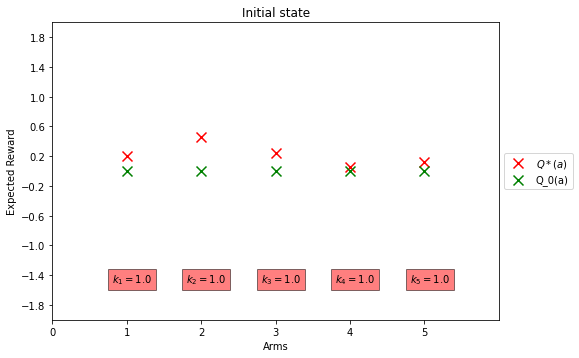

In [ ]:

k=5
c_slider2.value=1
Trials=0
button = widgets.Button(description="Next Trial")
output = widgets.Output()
widget1=widgets.HBox([button,c_slider2])
def on_button_clicked(b):
  global Trials
  # Run experiments
  Trials+=1
  decision,win=ucb.run()
  display.clear_output(wait=True)
  display.display(widget1)
  plot_portfolio(trialno=Trials,decision=decision,win=win)


def plot_interact_step(*args):


  global Trials
  Trials=0
  # Initialize bandits
  ucb.reset(c=c_slider2.value)
  decision=0
  win="Lose"
  print("ucb.mu",ucb.mu)
  # button = widgets.Button(description="Next Trial")
  # output = widgets.Output()
  button.on_click(on_button_clicked)


  display.clear_output(wait=True)
  display.display(widget1)
  plot_portfolio(trialno=0)



c_slider2.observe(plot_interact_step,'value')
plot_interact_step()



## Plot generated for nth Iteration

As the number of steps $n$ increases to infinity $Q_n(a)$ converges to $Q^*(a)$

You can vary `iters` and `c` as required

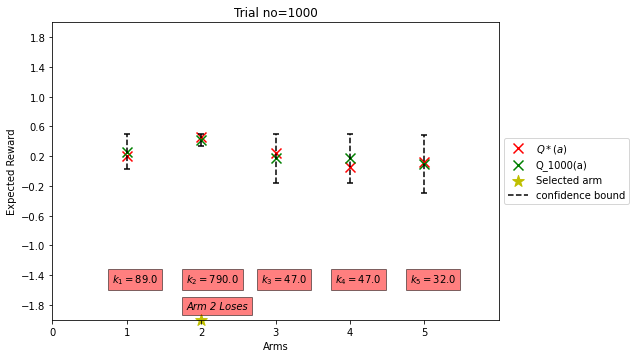

In [ ]:

c_slider_n=widgets.FloatSlider(value=1,
                                 min=0.1,
                                 max=1,
                                 step=.1,
                                 description='c',
                                 continuous_update=False)

iters_slider=widgets.IntSlider(value=5000,
                                 min=1000,
                                 max=5000,
                                 step=1000,
                                 description='iters',
                                 continuous_update=False)

widget2=widgets.HBox([c_slider_n,iters_slider])
k=5
iters=5000

def plot_interact_niters(*args):
  # Initialize bandits
  ucb.reset(c=c_slider_n.value)
  decision=0
  print("ucb.mu",ucb.mu)
  for i in range(iters_slider.value):
      decision,win=ucb.run()
  
  display.clear_output(wait=True)
  display.display(widget2)

  plot_portfolio(trialno=(i+1),decision=decision,win=win)


c_slider_n.observe(plot_interact_niters,'value')
iters_slider.observe(plot_interact_niters,'value')
plot_interact_niters()





## Performance 

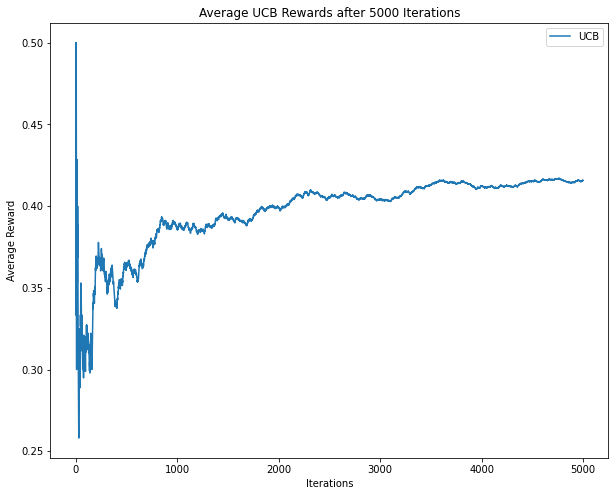

In [ ]:
k = 5 # number of arms
iters = 5000

ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb.reset(c=1)
for i in range(iters): 
    ucb.run()
    ucb_rewards[i]= ucb.mean_reward 



plt.figure(figsize=(10,8))
fig=plt.gcf()
fig.set_facecolor('white')
plt.plot(ucb_rewards, label="UCB")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after " 
           + str(iters) + " Iterations")
plt.show()